In [15]:
import numpy as np
import matplotlib.pyplot as plt
import gc
import xarray as xr
import xrft as xrft
import warnings
import matplotlib.colors as colors
from glob import glob
import sys
import matplotlib.gridspec as gridspec

from dask.diagnostics import ProgressBar
sys.path.append("/homes/metogra/iufarias/FeedbackSubmeso/useful/")
import romspickle
import scipy.integrate as integ
warnings.filterwarnings("ignore")

In [16]:
def ogive(deltaf,G):
    '''
    ogive(deltaf,G): use very simple integration to calculate the ogive 
    from a spectrum G with data sampled at frequency deltaf.
    2017-01-10T09:40:31 going back to a single frequency for Os and Gs
    '''
    M1 = len(G)
    Og = np.zeros(M1,float)
    Og[0:M1] = np.cumsum(np.flipud(G[0:M1]))
    Og *= deltaf
    Og = np.flipud(Og)
    return Og



In [17]:

plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 22})

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Lucida Grande']

In [4]:
def spec_ogive(spec,kr):
    
    Ogive_Kr=np.array(kr)
    # Middle Value Wavenumber position for plot
    Ogive_Krx=(Ogive_Kr[:-1]+Ogive_Kr[1:])/2
    # dK=np.diff(Ogive_Kr)[0]
    
    #Flipped Integration in wavenumber and then flipped again
    Ogive_inv=integ.cumtrapz(y=spec[::-1],x=Ogive_Kr[::-1]);
    Ogive_Spec=-Ogive_inv[::-1];


    return Ogive_Krx,Ogive_Spec

def ogive(deltaf,G):
   '''
   ogive(deltaf,G): use very simple integration to calculate the ogive 
   from a spectrum G with data sampled at frequency deltaf.
   2017-01-10T09:40:31 going back to a single frequency for Os and Gs
   '''
# --------------------------------------------------------------------
# 2016-10-08T09:47:12 re-created with numpy
# --------------------------------------------------------------------
   M1 = len(G)
   Og = np.zeros(M1,float)
   Og[0:M1] = np.cumsum(np.flipud(G[0:M1]))
   Og *= deltaf
   Og = np.flipud(Og)
   return Og



In [5]:
dxx=0.5
dyy=dxx
N2r=2.175e-05

In [6]:
eke_full=xr.open_dataset('/homes/metogra/iufarias/Documents/data/new_spec/Eke_full_total.nc')['__xarray_dataarray_variable__']
eke_smth=xr.open_dataset('/homes/metogra/iufarias/Documents/data/new_spec/Eke_smth_total.nc')['__xarray_dataarray_variable__']

n2_full=xr.open_dataarray('/homes/metogra/iufarias/Documents/data/new_spec/N2z_mean_full_total.nc')
n2_smth=xr.open_dataarray('/homes/metogra/iufarias/Documents/data/new_spec/N2z_mean_smth_total.nc')

B_full=xr.open_dataset('/homes/metogra/iufarias/Documents/data/new_spec/B_full_total.nc')['__xarray_dataarray_variable__'] #multiply by N2r before
B_smth=xr.open_dataset('/homes/metogra/iufarias/Documents/data/new_spec/B_smth_total.nc')['__xarray_dataarray_variable__']

wb_full=xr.open_mfdataset('/homes/metogra/iufarias/Documents/data/new_spec/wb_full_*.nc',data_vars='minimal')['__xarray_dataarray_variable__']
wb_smth=xr.open_mfdataset('/homes/metogra/iufarias/Documents/data/new_spec/wb_smth_*.nc',data_vars='minimal')['__xarray_dataarray_variable__']

In [7]:
# eke_full=xr.open_mfdataset('/homes/metogra/iufarias/Documents/data/new_spec/Eke_full_0*.nc')['__xarray_dataarray_variable__']
# eke_smth=xr.open_mfdataset('/homes/metogra/iufarias/Documents/data/new_spec/Eke_smth_0*.nc')['__xarray_dataarray_variable__']

# n2_full=xr.open_dataarray('/homes/metogra/iufarias/Documents/data/new_spec/N2z_mean_full_total.nc')
# n2_smth=xr.open_dataarray('/homes/metogra/iufarias/Documents/data/new_spec/N2z_mean_smth_total.nc')

# epe_full=xr.open_mfdataset('/homes/metogra/iufarias/Documents/data/new_spec/Epe_full_0*.nc')['__xarray_dataarray_variable__'] #multiply by N2r before
# epe_smth=xr.open_mfdataset('/homes/metogra/iufarias/Documents/data/new_spec/Epe_smth_0*.nc')['__xarray_dataarray_variable__']

# wb_full=xr.open_mfdataset('/homes/metogra/iufarias/Documents/data/new_spec/wb_full_0*.nc',data_vars='minimal')['__xarray_dataarray_variable__']
# wb_smth=xr.open_mfdataset('/homes/metogra/iufarias/Documents/data/new_spec/wb_smth_0*.nc',data_vars='minimal')['__xarray_dataarray_variable__']

In [48]:
#EPE calculation
n2_compromise=(n2_full.mean(axis=0)+ n2_smth.mean(axis=0))/2

epe_full_new=(1/(2*n2_compromise.data[None,:,None]))*B_full
epe_smth_new=(1/(2*n2_compromise.data[None,:,None]))*B_smth


# epe_full_new=(1/(2*n2_full.data[:,:,None]))*B_full
# epe_smth_new=(1/(2*n2_smth.data[:,:,None]))*B_smth



In [8]:
# import datetime

# # t_ind=pd.DatetimeIndex(varf.time_counter.compute())
# t_ind=varf.time_counter.groupby("time_counter.dayofyear").mean()
# t_ind_h=varf.time_counter


# mon_ind=t_ind.dt.month
# mes=np.array([12,1,2,3,4,5,6,7])
# mes_str=['Dec/11','Jan/12','Feb/12','Mar/12','Apr/12','May/12','Jun/12','Jul/12']

# 3D Plots

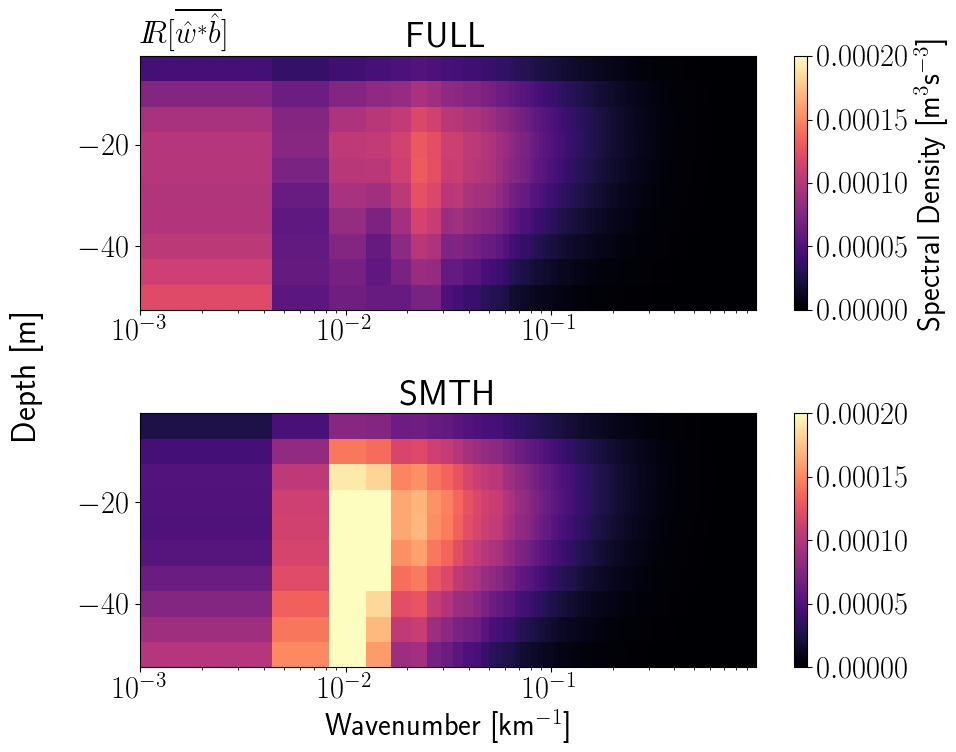

In [9]:
fig=plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.pcolormesh(wb_full.freq_r/dxx,wb_full.z_rho,wb_full.mean('ocean_time')/dxx*1e3,vmin=0,vmax=2e-4,cmap='magma')
cb1=plt.colorbar()
cb1.set_label(r'Spectral Density [m$^{3}$s$^{-3}$]')
plt.text(1e-3,0,r'$I\!\!R[\overline{\hat{w}^{*} \hat{b}}]$')
plt.title(r'FULL')
plt.xscale('log')
plt.xlim(1e-3,0)

plt.subplot(2,1,2)
plt.pcolormesh(wb_smth.freq_r/dxx,wb_smth.z_rho,wb_smth.mean('ocean_time')/dxx*1e3,vmin=0,vmax=2e-4,cmap='magma')
plt.colorbar()
plt.title(r'SMTH')

plt.xscale('log')
plt.xlim(1e-3,0)
plt.xlabel(r'Wavenumber  [km$^{-1}$]',fontweight='bold')

fig.supylabel('Depth [m]',fontsize=24,x=0.03)



plt.tight_layout()
# plt.savefig('/homes/metogra/iufarias/Documents/figures/2_CROCO/CROCO_zintegrated/wb_integrated_50m_total.png')


In [188]:
#CALULATED KE WRONGLY (SEE 3D_parameter_saver)

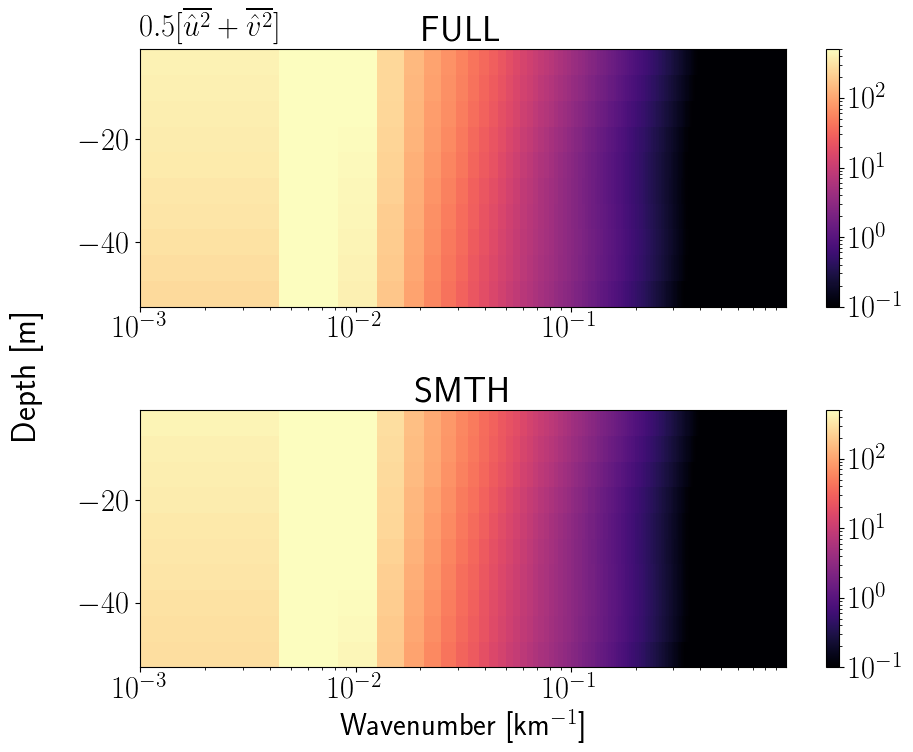

In [10]:

vminlim=0.1
vmaxlim=500
xmin=1e-3
log=True

fig=plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
if log:
    str_plot='log_plot'
    plt.pcolormesh(eke_full.freq_r/dxx,eke_full.z_rho_psi,eke_full.mean('ocean_time')/dxx*1e3,
                   norm=colors.LogNorm(vmin=vminlim,
                                       vmax=vmaxlim),cmap='magma')
else:
    str_plot='common'
    plt.pcolormesh(eke_full.freq_r/dxx,eke_full.z_rho_psi,eke_full.mean('ocean_time')/dxx*1e3,vmin=vminlim,vmax=vmaxlim,cmap='magma')

plt.colorbar()
plt.text(xmin,0,r'$0.5[\overline{\hat{u}^{2}} +  \overline{\hat{v}^{2}}]$')
plt.title(r'FULL')
plt.xscale('log')
plt.xlim(1e-3,0)

plt.subplot(2,1,2)
if log:
    plt.pcolormesh(eke_smth.freq_r/dxx,eke_smth.z_rho_psi,eke_smth.mean('ocean_time')/dxx*1e3,
                                  norm=colors.LogNorm(vmin=vminlim,
                                       vmax=vmaxlim),cmap='magma')
else:
    plt.pcolormesh(eke_smth.freq_r/dxx,eke_smth.z_rho_psi,eke_smth.mean('ocean_time')/dxx*1e3,vmin=0.1,vmax=vmaxlim,cmap='magma')


plt.colorbar()
plt.title(r'SMTH')

plt.xscale('log')
plt.xlim(xmin,0)
plt.xlabel(r'Wavenumber  [km$^{-1}$]',fontweight='bold')

fig.supylabel('Depth [m]',fontsize=24,x=0.03)



plt.tight_layout()
# plt.savefig('/homes/metogra/iufarias/Documents/figures/2_CROCO/CROCO_zintegrated/eke_integrated_50m_total_{0}.png'.format(str_plot))



In [18]:
from pyspec import spectrum
import seawater as sw

In [19]:
60*60*24

86400

In [39]:
Lat_mean=xr.open_dataset('/data/pacific/lrenault/SASI/FULL/WRF/wrf_3D_Y2011M06_DAY.nc')['nav_lat'].compute().mean()
T_ind=np.int((2*np.pi/sw.f(lat=Lat_mean))/(60*60*6))

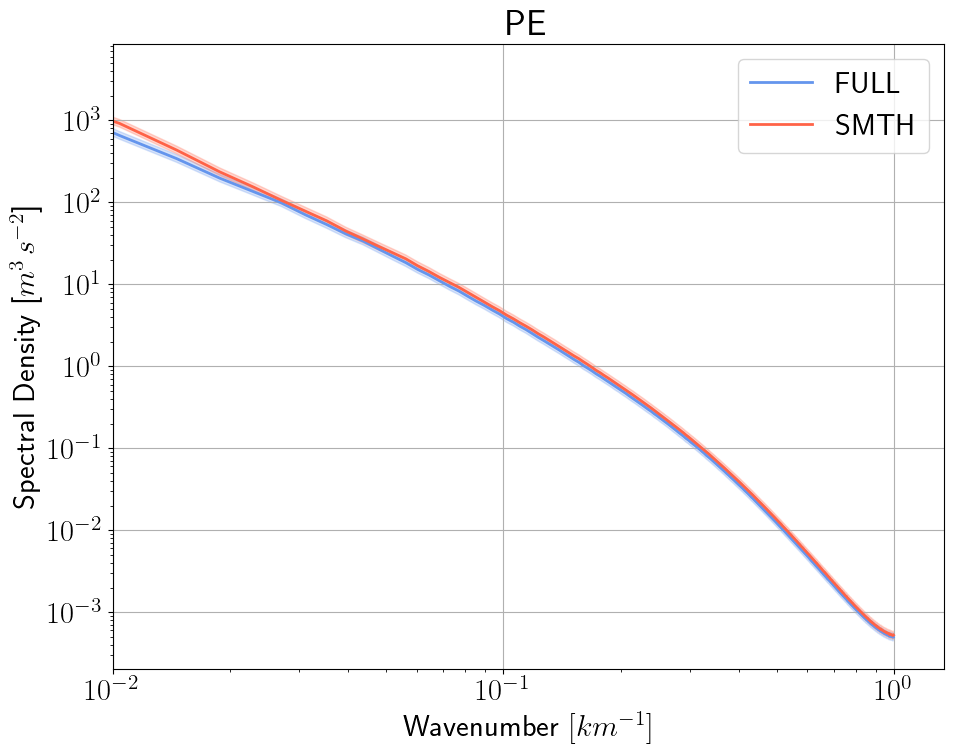

In [51]:

Eu_full,El_full=spectrum.spec_error(epe_full_new.mean(axis=(0,1)),sn=728/T_ind, ci=0.95)
Eu_smth,El_smth=spectrum.spec_error(epe_smth_new.mean(axis=(0,1)),sn=728/T_ind, ci=0.95)

dxx=0.5


plt.figure(figsize=(10,8))
plt.plot(epe_full_new.freq_r/dxx,epe_full_new.mean(axis=(0,1))/dxx*1e3,label='FULL',linewidth=2,color='cornflowerblue')
plt.fill_between(eke_full.freq_r/dxx,El_full/dxx*1e3,Eu_full/dxx*1e3, color='cornflowerblue', alpha=0.25)

plt.plot(epe_smth_new.freq_r/dxx,epe_smth_new.mean(axis=(0,1))/dxx*1e3,label='SMTH',linewidth=2,color='tomato')
plt.fill_between(eke_smth.freq_r/dxx,El_smth/dxx*1e3,Eu_smth/dxx*1e3, color='tomato', alpha=0.25)


# plt.plot(eke_smth.freq_r/dxx,eke_smth.mean(axis=(0,1))/dxx*1e3,label='SMTH',linewidth=2,color='tomato')




# k2 = np.array([eke_full.freq_r[0],eke_full.freq_r[-1]])/dxx
# E2 = ((1/k2)**2)*(1e-2)

# k3 = np.array([eke_full.freq_r[0],eke_full.freq_r[-1]])/dxx
# E3 = ((1/k3)**3)*(1e-2)


# plt.plot(k2,E2,'k--',alpha=0.2)
# plt.text(0.7,0.5e-2,r'$\kappa^{-2}$',weight='normal',alpha=0.2)

# plt.plot(k3,E3,'b--',alpha=0.2)
# plt.text(0.7,5e-2,r'$\kappa^{-3}$',weight='normal',color='b',alpha=0.2)

plt.grid()


plt.yscale('log')
plt.xscale('log')
plt.legend()

plt.title('PE',fontweight='bold')
plt.ylabel(r'Spectral Density [$m^3\,s^{-2}$]',fontweight='bold')
plt.xlabel(r'Wavenumber  $[km^{-1}]$',fontweight='bold')

plt.xlim(1e-2,0)
# plt.ylim(0,1e3)
plt.tight_layout()

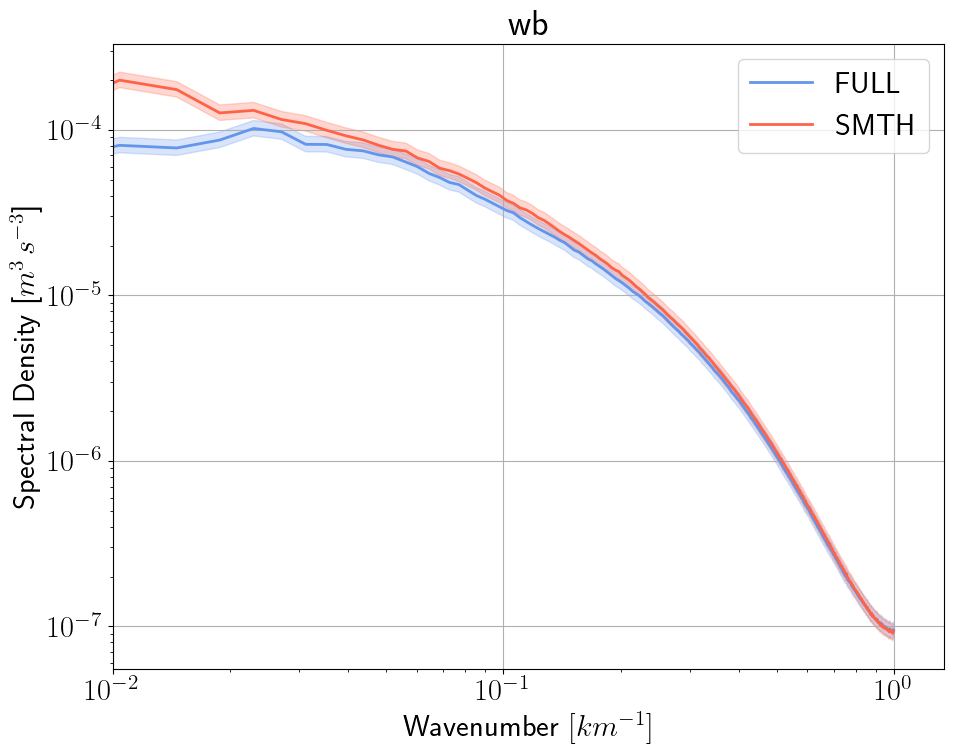

In [53]:

Eu_full,El_full=spectrum.spec_error(wb_full.mean(axis=(0,1)),sn=728/T_ind, ci=0.95)
Eu_smth,El_smth=spectrum.spec_error(wb_smth.mean(axis=(0,1)),sn=728/T_ind, ci=0.95)

dxx=0.5


plt.figure(figsize=(10,8))
plt.plot(wb_full.freq_r/dxx,wb_full.mean(axis=(0,1))/dxx*1e3,label='FULL',linewidth=2,color='cornflowerblue')
plt.fill_between(eke_full.freq_r/dxx,El_full/dxx*1e3,Eu_full/dxx*1e3, color='cornflowerblue', alpha=0.25)

plt.plot(wb_smth.freq_r/dxx,wb_smth.mean(axis=(0,1))/dxx*1e3,label='SMTH',linewidth=2,color='tomato')
plt.fill_between(eke_smth.freq_r/dxx,El_smth/dxx*1e3,Eu_smth/dxx*1e3, color='tomato', alpha=0.25)


# plt.plot(eke_smth.freq_r/dxx,eke_smth.mean(axis=(0,1))/dxx*1e3,label='SMTH',linewidth=2,color='tomato')




# k2 = np.array([eke_full.freq_r[0],eke_full.freq_r[-1]])/dxx
# E2 = ((1/k2)**2)*(1e-2)

# k3 = np.array([eke_full.freq_r[0],eke_full.freq_r[-1]])/dxx
# E3 = ((1/k3)**3)*(1e-2)


# plt.plot(k2,E2,'k--',alpha=0.2)
# plt.text(0.7,0.5e-2,r'$\kappa^{-2}$',weight='normal',alpha=0.2)

# plt.plot(k3,E3,'b--',alpha=0.2)
# plt.text(0.7,5e-2,r'$\kappa^{-3}$',weight='normal',color='b',alpha=0.2)

plt.grid()


plt.yscale('log')
plt.xscale('log')
plt.legend()

plt.title('wb',fontweight='bold')
plt.ylabel(r'Spectral Density [$m^3\,s^{-3}$]',fontweight='bold')
plt.xlabel(r'Wavenumber  $[km^{-1}]$',fontweight='bold')

plt.xlim(1e-2,0)
# plt.ylim(0,1e3)
plt.tight_layout()

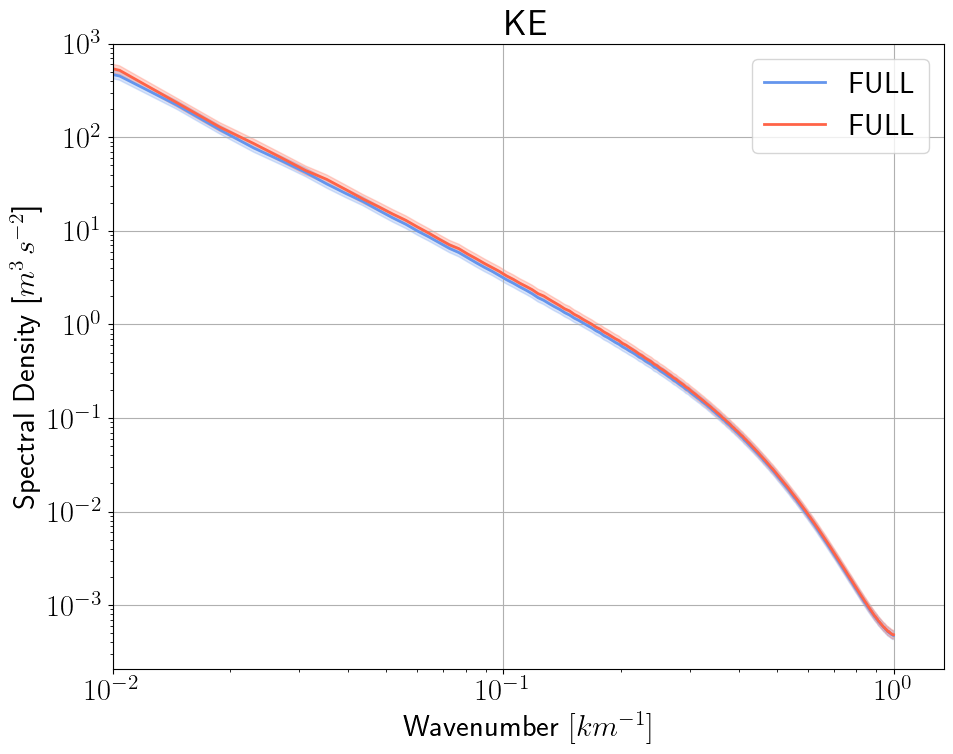

In [38]:

Eu_full,El_full=spectrum.spec_error(eke_full.mean(axis=(0,1)),sn=728/T_ind, ci=0.95)
Eu_smth,El_smth=spectrum.spec_error(eke_smth.mean(axis=(0,1)),sn=728/T_ind, ci=0.95)

dxx=0.5


plt.figure(figsize=(10,8))
plt.plot(eke_full.freq_r/dxx,eke_full.mean(axis=(0,1))/dxx*1e3,label='FULL',linewidth=2,color='cornflowerblue')
plt.fill_between(eke_full.freq_r/dxx,El_full/dxx*1e3,Eu_full/dxx*1e3, color='cornflowerblue', alpha=0.25)

plt.plot(eke_smth.freq_r/dxx,eke_smth.mean(axis=(0,1))/dxx*1e3,label='FULL',linewidth=2,color='tomato')
plt.fill_between(eke_smth.freq_r/dxx,El_smth/dxx*1e3,Eu_smth/dxx*1e3, color='tomato', alpha=0.25)


# plt.plot(eke_smth.freq_r/dxx,eke_smth.mean(axis=(0,1))/dxx*1e3,label='SMTH',linewidth=2,color='tomato')




# k2 = np.array([eke_full.freq_r[0],eke_full.freq_r[-1]])/dxx
# E2 = ((1/k2)**2)*(1e-2)

# k3 = np.array([eke_full.freq_r[0],eke_full.freq_r[-1]])/dxx
# E3 = ((1/k3)**3)*(1e-2)


# plt.plot(k2,E2,'k--',alpha=0.2)
# plt.text(0.7,0.5e-2,r'$\kappa^{-2}$',weight='normal',alpha=0.2)

# plt.plot(k3,E3,'b--',alpha=0.2)
# plt.text(0.7,5e-2,r'$\kappa^{-3}$',weight='normal',color='b',alpha=0.2)

plt.grid()


plt.yscale('log')
plt.xscale('log')
plt.legend()

plt.title('KE',fontweight='bold')
plt.ylabel(r'Spectral Density [$m^3\,s^{-2}$]',fontweight='bold')
plt.xlabel(r'Wavenumber  $[km^{-1}]$',fontweight='bold')

plt.xlim(1e-2,0)
plt.ylim(0,1e3)
plt.tight_layout()

In [170]:
#Recalculating PE #everything wrong, correct 3D_parameter_saver
# epe_full_cor= (N2r/0.5)*epe_full
# epe_full_copy=np.sqrt(epe_full_cor)
# # epe_full_new=(1/(2*n2_full.data[:,:,None]))*epe_full_copy
# epe_full_new=(1/(2*n2_full.mean(axis=0).data[None,:,None]))*epe_full_copy



# epe_smth_cor= (N2r/0.5)*epe_smth
# epe_smth_copy=np.sqrt(epe_smth_cor)
# # epe_smth_new=(1/(2*n2_smth.data[:,:,None]))*epe_smth_copy
# epe_smth_new=(1/(2*n2_smth.mean(axis=0).data[None,:,None]))*epe_smth_copy




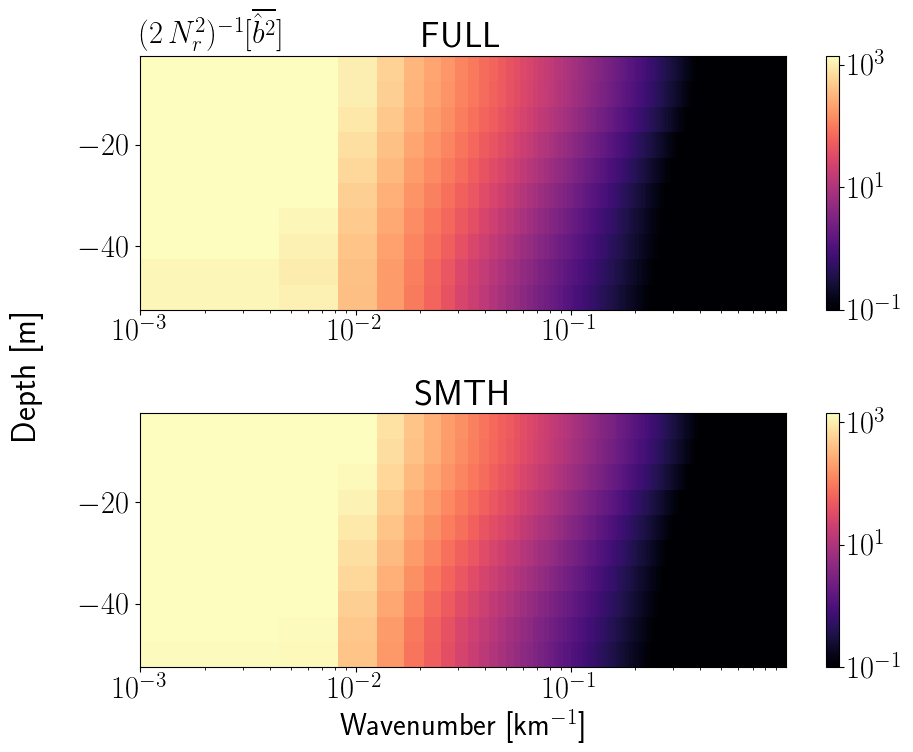

In [14]:
fig=plt.figure(figsize=(10,8))
plt.subplot(2,1,1)

vminlim=0.1
vmaxlim=1400
xmin=1e-3
log=True

if log:
    str_plot='log_plot'

    plt.pcolormesh(epe_full_new.freq_r/dxx,epe_full_new.z_rho,epe_full_new.mean('ocean_time')/dxx*1e3,
                   norm=colors.LogNorm(vmin=vminlim,vmax=vmaxlim),cmap='magma')
else:
    str_plot='common'
    plt.pcolormesh(epe_full_new.freq_r/dxx,epe_full_new.z_rho,epe_full_new.mean('ocean_time')/dxx*1e3,
                   vmin=vminlim,vmax=vmaxlim,cmap='magma')


plt.colorbar()
plt.text(xmin,0,r'$(2\,N^2_r)^{-1}[\overline{\hat{b}^{2}}]$')
plt.title(r'FULL')
plt.xscale('log')
plt.xlim(xmin,0)

plt.subplot(2,1,2)

if log:
    plt.pcolormesh(epe_smth_new.freq_r/dxx,epe_smth_new.z_rho,epe_smth_new.mean('ocean_time')/dxx*1e3,
               norm=colors.LogNorm(vmin=vminlim,vmax=vmaxlim),cmap='magma')
else:
    plt.pcolormesh(epe_smth_new.freq_r/dxx,epe_smth_new.z_rho,epe_smth_new.mean('ocean_time')/dxx*1e3,
               vmin=vminlim,vmax=vmaxlim,cmap='magma')                              
plt.colorbar()
plt.title(r'SMTH')

plt.xscale('log')
plt.xlim(xmin,0)
plt.xlabel(r'Wavenumber  [km$^{-1}$]',fontweight='bold')

fig.supylabel('Depth [m]',fontsize=24,x=0.03)



plt.tight_layout()
# plt.savefig('/homes/metogra/iufarias/Documents/figures/2_CROCO/CROCO_zintegrated/PE_integrated_50m_total_{0}.png'.format(str_plot))



# Panel 1 - Ogives

In [6]:

path='/data/pacific/lrenault/SASI/CROCO/FULL/'
listm=glob(path+'surf*.nc');listm.sort()
# varf=xr.open_dataset(listm[-9:][xmon])
varf=xr.open_mfdataset(listm[1:],data_vars='minimal')

path='/data/pacific/lrenault/SASI/CROCO/SMTH/'
listt=glob(path+'surf*SASI_6h_his_20*_*.nc');listt.sort()
listt.append('/data/pacific/lrenault/SASI/CROCO/SMTH/surf_SASI_6h_his_2012-07.nc')
#vart=xr.open_dataset(listt[xmon])
vart=xr.open_mfdataset(listt[1:],data_vars='minimal')

#### Loading currents and windstress for windwork

In [7]:
chunks_new={'time_counter':10}

In [8]:
%%time
uf=varf.u
uf=uf.chunk(chunks=chunks_new);
uf=uf.compute();

ut=vart.u
ut=ut.chunk(chunks=chunks_new);
ut=ut.compute();

vf=varf.v
vf=vf.chunk(chunks=chunks_new);
vf=vf.compute();

vt=vart.v
vt=vt.chunk(chunks=chunks_new);
vt=vt.compute();



CPU times: user 12 s, sys: 15.4 s, total: 27.3 s
Wall time: 3min 1s


In [9]:
uf,vf,_=romspickle.uvw2rho_3d(uf,vf,uf)
uf,vf=uf[:,120:-120,120:800],vf[:,120:-120,120:800]

ut,vt,_=romspickle.uvw2rho_3d(ut,vt,ut)
ut,vt=ut[:,120:-120,120:800],vt[:,120:-120,120:800]

In [10]:
%time
usf=varf.sustr
usf=usf.chunk(chunks=chunks_new);
usf=usf.compute();


ust=vart.sustr
ust=ust.chunk(chunks=chunks_new);
ust=ust.compute();



vsf=varf.svstr
vsf=vsf.chunk(chunks=chunks_new);
vsf=vsf.compute();


vst=vart.svstr
vst=vst.chunk(chunks=chunks_new);
vst=vst.compute();




CPU times: user 2 µs, sys: 3 µs, total: 5 µs
Wall time: 12.4 µs


In [11]:
usf,vsf,_=romspickle.uvw2rho_3d(usf,vsf,usf)
ust,vst,_=romspickle.uvw2rho_3d(ust,vst,vst)

usf,vsf=usf[:,120:-120,120:800],vsf[:,120:-120,120:800]
ust,vst=ust[:,120:-120,120:800],vst[:,120:-120,120:800]

In [12]:
nfw=2
wdws='hann' #'flattop','hann'
wdw_cor=True
scl='density'


with ProgressBar():
    Xf=xrft.isotropic_cross_spectrum(usf,uf,
                                      dim=['y_u','x_u'],nfactor=nfw,truncate='True',scaling=scl,detrend='linear', 
                                     window=wdws,window_correction=wdw_cor).real

    Yf=xrft.isotropic_cross_spectrum(vsf,vf,
                                      dim=['y_v','x_v'],nfactor=nfw,truncate='True',scaling=scl,detrend='linear', 
                                     window=wdws,window_correction=wdw_cor).real


    Xt=xrft.isotropic_cross_spectrum(ust,ut,
                                      dim=['y_u','x_u'],nfactor=nfw,truncate='True',scaling=scl,detrend='linear', 
                                     window=wdws,window_correction=wdw_cor).real

    Yt=xrft.isotropic_cross_spectrum(vst,vt,
                                      dim=['y_v','x_v'],nfactor=nfw,truncate='True',scaling=scl,detrend='linear', 
                                     window=wdws,window_correction=wdw_cor).real



In [13]:

WWf=xr.DataArray(data=(1/1024)*(Xf.real.data + Yf.real.data),coords=({'time_counter':Xf.time_counter,'freq_r':Xf.freq_r.data}));
WWt=xr.DataArray(data=(1/1024)*(Xt.real.data + Yt.real.data),coords=({'time_counter':Xf.time_counter,'freq_r':Xf.freq_r.data}));

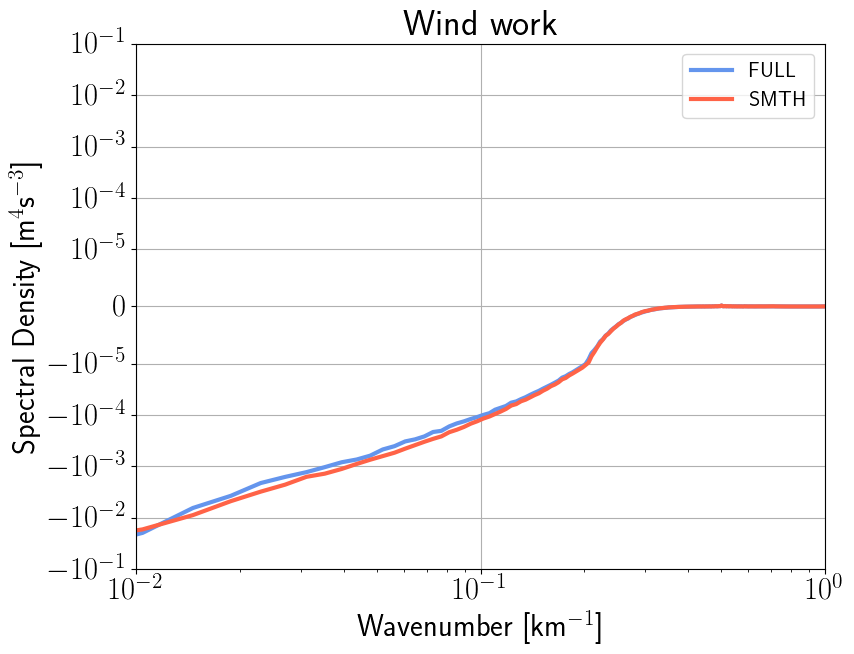

In [25]:
plt.figure(figsize=(9,7))

plt.plot(WWf.freq_r/dxx,(WWf.mean(axis=0))/dxx*1e3,label='FULL',linewidth=3,color='cornflowerblue')
plt.plot(WWt.freq_r/dxx,(WWt.mean(axis=0))/dxx*1e3,label='SMTH',linewidth=3,color='tomato')


plt.legend(prop={'size': 15})

plt.yscale('symlog',linthresh=1e-5)
plt.xscale('log') 

plt.ylabel(r'Spectral Density [m$^{4}$s$^{-3}$]',fontweight='bold')
plt.xlabel(r'Wavenumber  [km$^{-1}$]',fontweight='bold')

plt.title('Wind work')
plt.xlim(1/100,1)
plt.ylim(-1e-1,1e-1)
plt.grid()

plt.tight_layout()
plt.savefig('/homes/metogra/iufarias/Documents/figures/2_CROCO/bBo/windwork_spectral.png')


### Ogives computation

In [17]:
dz=np.abs(np.diff(eke_full.z_rho_psi).mean())
#KE

KAf=ogive(eke_full.freq_r/dxx*1e3,(eke_full.sum(['z_rho_psi'])*dz).mean('ocean_time')/dxx*1e3) #in metersss
Kxa=eke_full.freq_r/dxx #in Kilometers
KAt=ogive(eke_smth.freq_r/dxx*1e3,(eke_smth.sum(['z_rho_psi'])*dz).mean('ocean_time')/dxx*1e3) #in metersss


#PE
Kbf=ogive(epe_full_new.freq_r/dxx*1e3,(epe_full_new.sum(['z_rho'])*dz).mean('ocean_time')/dxx*1e3) #in metersss
Kxb=epe_full_new.freq_r/dxx #in Kilometers
Kbt=ogive(epe_smth_new.freq_r/dxx*1e3,(epe_smth_new.sum(['z_rho'])*dz).mean('ocean_time')/dxx*1e3)#in metersss


#wind work
WWpf=ogive(WWf.freq_r/dxx*1e3,np.nanmean(WWf,axis=0)/dxx*1e3) #in metersss
Kxw=WWf.freq_r/dxx #in Kilometers
WWpt=ogive(WWt.freq_r/dxx*1e3,np.nanmean(WWt,axis=0)/dxx*1e3)#in metersss

#wb

Kwbf=ogive(wb_full.freq_r/dxx*1e3,(wb_full.sum(['z_rho'])*dz).mean('ocean_time')/dxx*1e3) #in metersss
Kxwb=wb_full.freq_r/dxx #in Kilometers
Kwbt=ogive(wb_smth.freq_r/dxx*1e3,(wb_smth.sum(['z_rho'])*dz).mean('ocean_time')/dxx*1e3)#in metersss




(-0.5, 0.0)

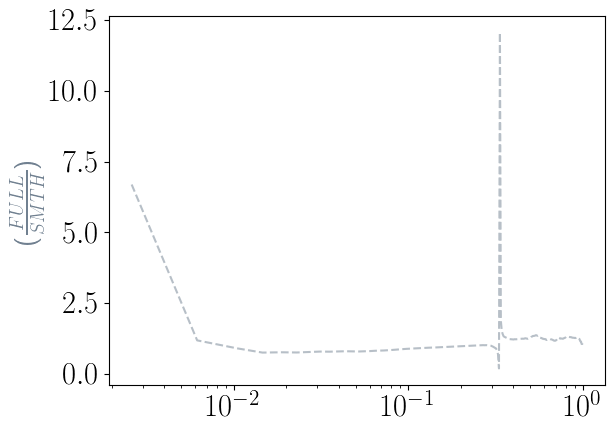

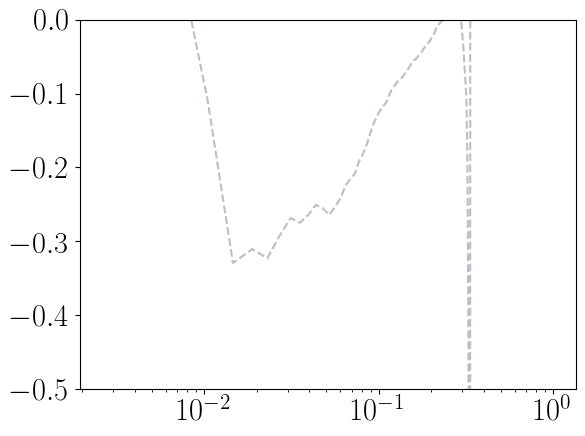

In [34]:
plt.figure()
# plt.plot((Kxb),((Kbf)/(Kbt)),alpha=0.5,linestyle='dashed',color='slategrey')
# plt.plot((Kxa),((KAf)/(KAt)),alpha=0.5,linestyle='dashed',color='slategrey')
# plt.plot((Kxwb),((Kwbf)/(Kwbt)),alpha=0.5,linestyle='dashed',color='slategrey')
plt.plot(Kxw,(WWpf)/(WWpt),alpha=0.5,linestyle='dashed',color='slategrey')

plt.ylabel(r'($\frac{FULL}{SMTH}$)',fontsize=20,color='slategrey')
plt.xscale('log')
# plt.yticks([0.80,0.90,1])
# plt.ylim(0.75,1)


plt.figure()
# plt.plot((Kxb),((Kbf-Kbt)/(Kbf)),alpha=0.5,linestyle='dashed',color='slategrey')
# plt.plot((Kxa),((KAf-KAt)/(KAf)),alpha=0.5,linestyle='dashed',color='slategrey')
# plt.plot((Kxwb),((Kwbf-Kwbt)/(Kwbf)),alpha=0.5,linestyle='dashed',color='slategrey')
plt.plot(Kxw,(WWpf-WWpt)/(WWpf),alpha=0.5,linestyle='dashed',color='slategrey')

# plt.ylabel(r'($\frac{FULL}{SMTH}$)',fontsize=20,color='slategrey')
plt.xscale('log')
# plt.yticks([0.80,0.90,1])
plt.ylim(-0.50,0)


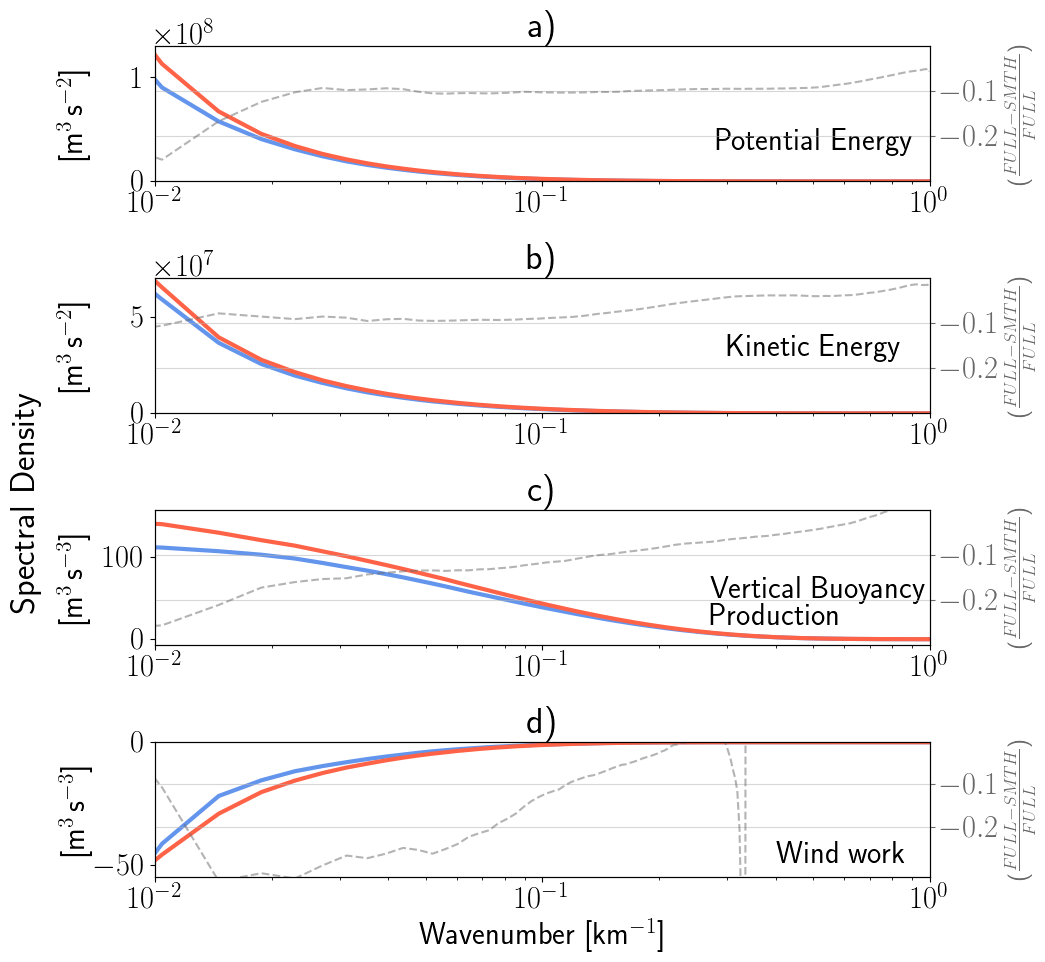

In [45]:
fig = plt.figure(figsize=(10,12))
gs1 = gridspec.GridSpec(40,20)

ax1 = fig.add_subplot(gs1[0:6,:])

ax1.plot(Kxb,Kbf,label='FULL',linewidth=3,color='cornflowerblue')
ax1.plot(Kxb,Kbt,label='SMTH',linewidth=3,color='tomato')
# ax.set_title('PE',fontsize=25,fontweight='bold')
ax1.text(2.8e-1,0.3e8,'Potential Energy')
ax1.set_xscale('log')
# ax1.set_yscale('log')

ax1.set_title('a)',fontweight='bold')
ax1.set_ylim(0,1.3e8)


# ax1.set_xlabel(r'Wavenumber  [km$^{-1}$]',fontweight='bold')
ax1.set_ylabel(r'[m$^{3}\,$s$^{-2}$]',fontweight='bold',labelpad=30)
ax1.set_xlim(1e-2,1)
# ax1.set_ylim(-1e-1,3e6)


# ax.legend()

ax12=ax1.twinx()
# ax12.plot((Kxb),((Kbf)/(Kbt)),alpha=0.5,linestyle='dashed',color='slategrey')
ax12.plot((Kxb),((Kbf-Kbt)/(Kbf)),alpha=0.5,linestyle='dashed',color='dimgray')

ax12.set_ylabel(r'($\frac{FULL-SMTH}{FULL}$)',fontsize=18,color='dimgray')
ax12.set_xscale('log')
ax12.set_yticks([-0.2,-0.1])
ax12.set_ylim(-0.30,0)
ax12.grid(alpha=0.5)
ax12.tick_params(axis='y', colors='dimgray')
            
               
ax2 = fig.add_subplot(gs1[10:16,:])


ax2.plot((Kxa),KAf,label='FULL',linewidth=3,color='cornflowerblue')
ax2.plot((Kxa),KAt,label='SMTH',linewidth=3,color='tomato')
# ax.set_title('KE (Ogive)',fontsize=15,fontweight='bold')
ax2.set_title('b)',fontweight='bold')

ax2.set_xscale('log')

ax2.text(3e-1,0.3e8,'Kinetic Energy')



# ax2.set_xlabel(r'Wavenumber [km$^{-1}$]',fontweight='bold')
ax2.set_ylabel(r'[m$^3\,$s$^{-2}$]',fontweight='bold',labelpad=30)
# ax.set_title(r'KE',fontsize=25)
ax2.set_xlim(1e-2,1)
ax2.set_ylim(-0.1,0.7e8)

ax22=ax2.twinx()
# ax2.plot((Kxa),((KAf)/(KAt)-1)*100,alpha=0.5,linestyle='dashed',color='cadetblue')
# ax22.plot((Kxa),((KAf)/(KAt)),alpha=0.5,linestyle='dashed',color='slategrey')
ax22.plot((Kxa),((KAf-KAt)/(KAf)),alpha=0.5,linestyle='dashed',color='dimgray')

ax22.set_ylim(0.901,1)



ax22.set_ylabel(r'($\frac{FULL-SMTH}{FULL}$)',fontweight='bold',fontsize=18,color='dimgray')
ax22.set_xscale('log')
ax22.set_yticks([-0.2,-0.1])
ax22.set_ylim(-0.30,0)
ax22.grid(alpha=0.5)
ax22.tick_params(axis='y', colors='dimgray')




ax3 = fig.add_subplot(gs1[20:26,:])


ax3.plot(Kxwb,Kwbf,label='FULL',linewidth=3,color='cornflowerblue')
ax3.plot(Kxwb,Kwbt,label='SMTH',linewidth=3,color='tomato')
# ax.set_title(r'$\int^{z=100}_{z=0}$ $wb$ $dz$',fontweight='bold')
ax3.set_title('c)',fontweight='bold')




ax3.set_xscale('log')

# ax3.set_xlabel(r'Wavenumber  [km$^{-1}$]',fontweight='bold')
ax3.set_ylabel(r'[m$^3\,$s$^{-3}$]',fontweight='bold',labelpad=10)
ax3.set_xlim(1e-2,1)
# ax.set_ylim(-1e-11,4e-11)

# yticks=np.arange(Kwbt.min(),Kwbt.max(),1e5)
# yticklabel=np.int_(yticks/1e5)
# ax3.set_yticks(yticks)
# ax3.set_yticklabels(yticklabel)

# ax3.text(1e-2,(yticks[-1]+0.5e5),r'$\times$10$^{5}$')
# ax3.text(3e-1,75,r'(100m-Integrated)',fontsize=25)
ax3.text(2.7e-1,50,r'Vertical Buoyancy')
ax3.text(2.7e-1,18,r'Production')



ax32=ax3.twinx()
ax32.plot((Kxwb),((Kwbf-Kwbt)/(Kwbf)),alpha=0.5,linestyle='dashed',color='dimgray')
ax32.set_ylabel(r'($\frac{FULL - SMTH }{FULL}$)',fontsize=18,color='dimgray')
ax32.set_xscale('log')
ax32.set_yticks([-0.2,-0.1])
ax32.set_ylim(-0.30,0)
ax32.grid(alpha=0.5)
ax32.tick_params(axis='y', colors='dimgray')



ax4 = fig.add_subplot(gs1[30:36,:])



ax4.plot(Kxw,WWpf,label='FULL',linewidth=3,color='cornflowerblue')
ax4.plot(Kxw,WWpt,label='SMTH',linewidth=3,color='tomato')

ax4.set_xlabel(r'Wavenumber  [km$^{-1}$]',fontweight='bold')
# ax.set_ylabel(r'Spectral Density [m$^3\,$s$^{-3}$]',fontweight='bold')
ax4.set_ylabel(r'[m$^3\,$s$^{-3}$]',fontweight='bold',labelpad=1)

ax4.set_title('d)',fontweight='bold')


# ax.set_title(r'$F_{KE}$',fontsize=25,fontweight='bold')
ax4.text(4e-1,-49,'Wind work')

ax4.set_xscale('log')

# ax.set_xticks(np.array([-2,-1]))
# ax.set_xticklabels([r'10$^{-2}$',r'10$^{-1}$'])
ax4.set_ylim(-55,0.1)
ax4.set_xlim(1e-2,1)
# ax.legend(loc=4)
decx=1
ax42=ax4.twinx()
# ax2.plot(Kxw[::decx],(np.abs(WWpf)/np.abs(WWpt))[::decx],alpha=0.5,linestyle='dashed',color='slategrey')

# ax42.plot(Kxw[::decx],(WWpf)/(WWpt)[::decx],alpha=0.5,linestyle='dashed',color='slategrey')
ax42.plot(Kxw,(WWpf-WWpt)/(WWpf),alpha=0.5,linestyle='dashed',color='dimgray')


ax42.set_ylabel(r'($\frac{FULL- SMTH}{FULL}$)',fontsize=18,color='dimgray')
# ax2.set_ylim(0.79,1)
ax42.set_xscale('log')
ax42.set_yticks([-0.2,-0.1])
ax42.set_ylim(-0.32,0)
ax42.grid(alpha=0.5)
ax42.tick_params(axis='y', colors='dimgray')

plt.tight_layout()

fig.supylabel('Spectral Density',fontsize=25,x=-0.02)
plt.savefig('/homes/metogra/iufarias/Documents/figures/2_CROCO/CROCO_surface/ogives/SUPER_PANEL_final_negative_differences.png',dpi=300,bbox_inches='tight')
# plt.savefig('/homes/metogra/iufarias/Documents/figures/2_CROCO/CROCO_surface/ogives/SUPER_PANEL_final_loglog.png',dpi=300,bbox_inches='tight')



# Estimate of the time scale $\Delta(\int KE dz + \int PE dz)$

### Absolute

In [62]:
dz=np.abs(np.diff(eke_full.z_rho_psi).mean())


KE_FULL_sum=(eke_full[:,:,eke_full.freq_r<=1e-2].sum(['z_rho_psi'])*dz).sum()/dxx*1e3
KE_SMTH_sum=(eke_smth[:,:,eke_smth.freq_r<=1e-2].sum(['z_rho_psi'])*dz).sum()/dxx*1e3


PE_FULL_sum=(epe_full_new[:,:,epe_full_new.freq_r<=1e-2].sum(['z_rho'])*dz).sum()/dxx*1e3
PE_SMTH_sum=(epe_smth_new[:,:,epe_smth_new.freq_r<=1e-2].sum(['z_rho'])*dz).sum()/dxx*1e3

print('DELTA KE*dz + DELTA PE*dz = {0} m3/s2'.format((KE_SMTH_sum-KE_FULL_sum).data + (PE_SMTH_sum-PE_FULL_sum).data))

DELTA KE*dz + DELTA PE*dz = 26597077.77909021 m3/s2


### Time Average

In [63]:


KE_FULL_sum_t=(eke_full[:,:,eke_full.freq_r<=1e-2].sum(['z_rho_psi'])*dz).mean('ocean_time').sum()/dxx*1e3
KE_SMTH_sum_t=(eke_smth[:,:,eke_smth.freq_r<=1e-2].sum(['z_rho_psi'])*dz).mean('ocean_time').sum()/dxx*1e3

PE_FULL_sum_t=(epe_full_new[:,:,epe_full_new.freq_r<=1e-2].sum(['z_rho'])*dz).mean('ocean_time').sum()/dxx*1e3
PE_SMTH_sum_t=(epe_smth_new[:,:,epe_smth_new.freq_r<=1e-2].sum(['z_rho'])*dz).mean('ocean_time').sum()/dxx*1e3

print('DELTA KE*dz + DELTA PE*dz = {0} m3/s2'.format((KE_SMTH_sum_t-KE_FULL_sum_t).data + (PE_SMTH_sum_t-PE_FULL_sum_t).data))

DELTA KE*dz + DELTA PE*dz = 36534.44749875035 m3/s2


### Spectral Hovmollers

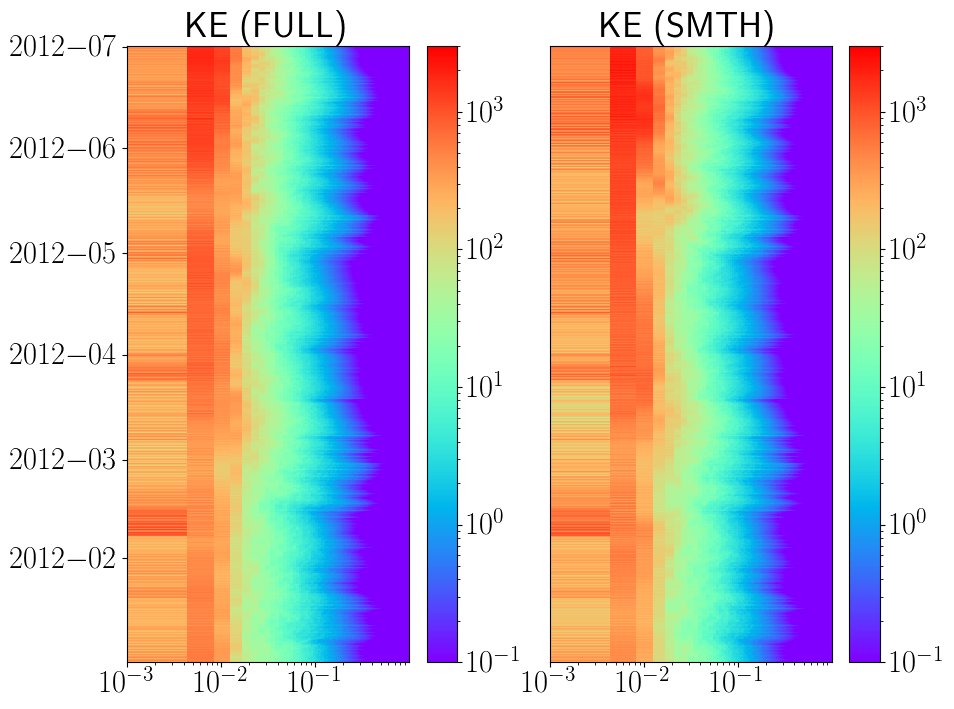

In [37]:
fig=plt.figure(figsize=(10,8))

vminlim=0.1
vmaxlim=3000

plt.subplot(1,2,1)
plt.pcolormesh(eke_full.freq_r/dxx,eke_full.ocean_time.data,eke_full.mean(axis=1)/dxx*1e3,
               norm=colors.LogNorm(vmin=vminlim,vmax=vmaxlim),cmap='rainbow')

plt.xscale('log')
plt.xlim(1e-3,0)
plt.colorbar()
plt.title('KE (FULL)')

plt.subplot(1,2,2)
plt.pcolormesh(eke_smth.freq_r/dxx,eke_full.ocean_time.data,eke_smth.mean(axis=1)/dxx*1e3,
               norm=colors.LogNorm(vmin=vminlim,vmax=vmaxlim),cmap='rainbow')
plt.xscale('log')
plt.xlim(1e-3,0)
plt.yticks([])
plt.title('KE (SMTH)')
plt.colorbar()
# plt.colorbar(orientation='horizontal')
plt.savefig('/homes/metogra/iufarias/Documents/figures/2_CROCO/CROCO_zintegrated/eke_hovmoller_50m_total_10e-3.png')

# plt.savefig('/homes/metogra/iufarias/Documents/figures/2_CROCO/CROCO_zintegrated/eke_hovmoller_50m_total.png')





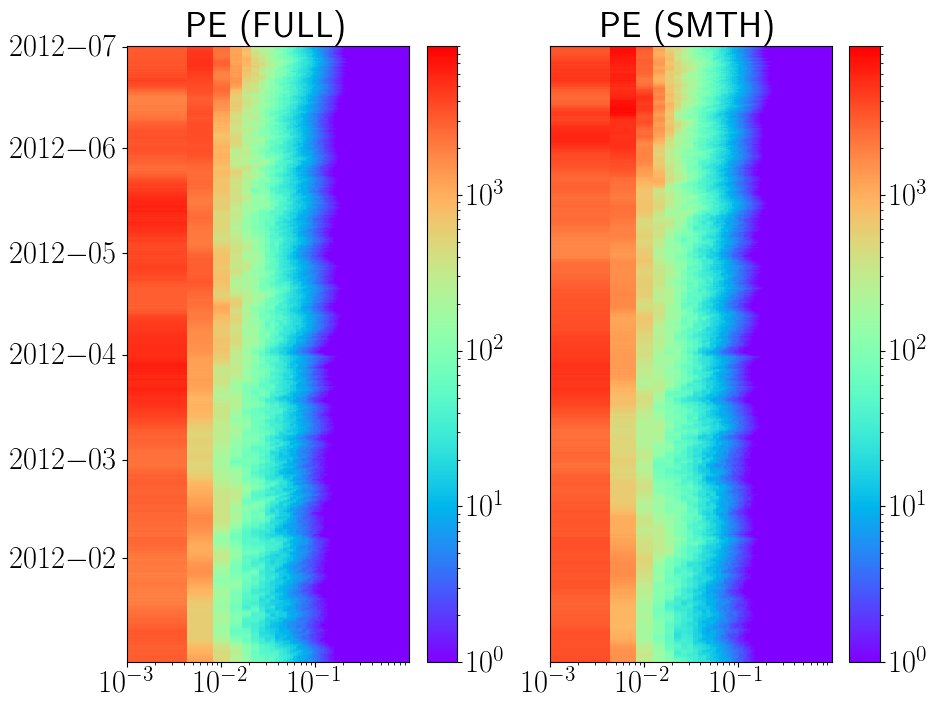

In [41]:
fig=plt.figure(figsize=(10,8))

vminlim=1
vmaxlim=9000

plt.subplot(1,2,1)
plt.pcolormesh(epe_full_new.freq_r/dxx,epe_full_new.ocean_time.data,epe_full_new.mean(axis=1)/dxx*1e3,
               norm=colors.LogNorm(vmin=vminlim,vmax=vmaxlim),cmap='rainbow')

plt.xscale('log')
plt.xlim(1e-3,0)
# plt.colorbar()
plt.title('PE (FULL)')
plt.colorbar()


plt.subplot(1,2,2)
plt.pcolormesh(epe_smth_new.freq_r/dxx,epe_smth_new.ocean_time.data,epe_smth_new.mean(axis=1)/dxx*1e3,
               norm=colors.LogNorm(vmin=vminlim,vmax=vmaxlim),cmap='rainbow')
plt.xscale('log')
plt.xlim(1e-3,0)
plt.yticks([])
plt.title('PE (SMTH)')
plt.colorbar()
plt.savefig('/homes/metogra/iufarias/Documents/figures/2_CROCO/CROCO_zintegrated/epe_hovmoller_50m_total_10e-3.png')
# plt.savefig('/homes/metogra/iufarias/Documents/figures/2_CROCO/CROCO_zintegrated/epe_hovmoller_50m_total.png')



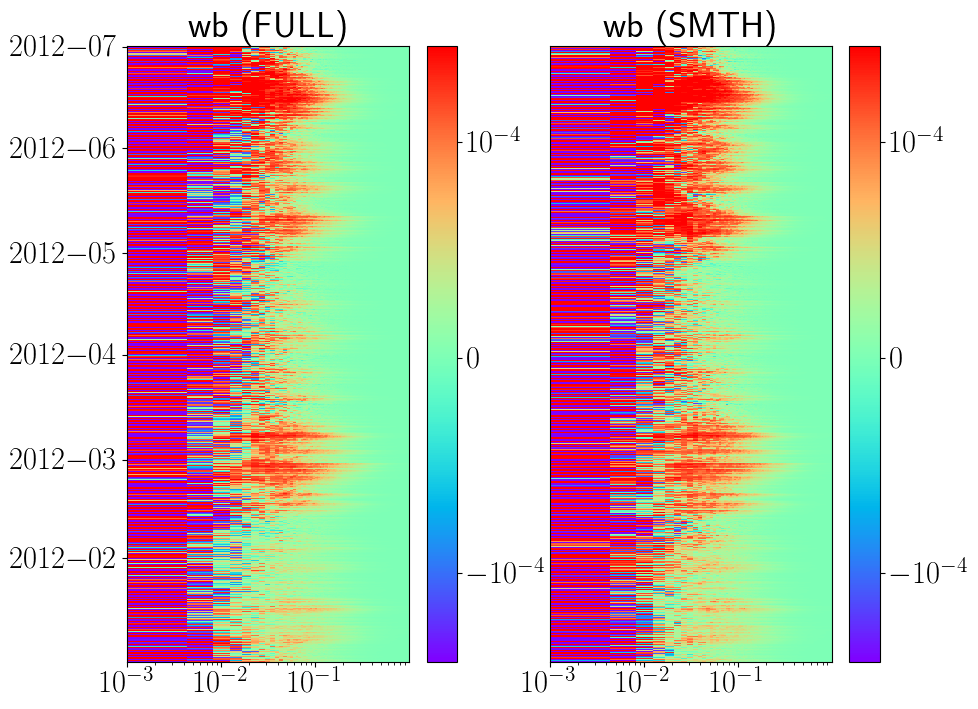

In [149]:
fig=plt.figure(figsize=(10,8))

vminlim=1.25e-05 -3*0.0001
vmaxlim=1.25e-05 + 3*0.0001
# vminlim=np.nanmin(wb_smth.mean(axis=1)/dxx*1e3)
# vmaxlim=np.nanmax(wb_smth.mean(axis=1)/dxx*1e3)


plt.subplot(1,2,1)
# plt.pcolormesh(wb_full.freq_r/dxx,wb_full.ocean_time.data,wb_full.mean(axis=1)/dxx*1e3,
#                vmax=vmaxlim,vmin=vminlim,cmap='rainbow');plt.colorbar()


plt.pcolormesh(wb_full.freq_r/dxx,wb_full.ocean_time.data,wb_full.mean(axis=1)/dxx*1e3
               ,norm=colors.SymLogNorm(linthresh=1e-4,vmax=vmaxlim,vmin=vminlim),cmap='rainbow');plt.colorbar()



# plt.contourf(wb_full.freq_r/dxx,wb_full.ocean_time.data,wb_full.mean(axis=1)/dxx*1e3
#                ,norm=colors.SymLogNorm(linthresh=1e-5,vmin=vminlim,vmax=vmaxlim),cmap='rainbow');
# plt.colorbar(norm=colors.SymLogNorm(linthresh=1e-5,vmin=vminlim,vmax=vmaxlim))

plt.xscale('log')
plt.xlim(1e-3,0)
plt.title('wb (FULL)')


plt.subplot(1,2,2)
# plt.pcolormesh(wb_smth.freq_r/dxx,wb_full.ocean_time.data,wb_smth.mean(axis=1)/dxx*1e3,
#                vmax=vmaxlim,vmin=vminlim,cmap='rainbow')
plt.pcolormesh(wb_smth.freq_r/dxx,wb_smth.ocean_time.data,wb_smth.mean(axis=1)/dxx*1e3
               ,norm=colors.SymLogNorm(linthresh=1e-4,vmax=vmaxlim,vmin=vminlim),cmap='rainbow')


plt.xscale('log')
plt.xlim(1e-3,0)
plt.yticks([])
plt.title('wb (SMTH)')
plt.colorbar()
# plt.savefig('/homes/metogra/iufarias/Documents/figures/2_CROCO/CROCO_zintegrated/wb_hovmoller_50m_total.png')
plt.savefig('/homes/metogra/iufarias/Documents/figures/2_CROCO/CROCO_zintegrated/wb_hovmoller_50m_1e-3total.png')




In [86]:
WB_f=wb_full.mean(axis=1)/dxx*1e3
WB_t=wb_smth.mean(axis=1)/dxx*1e3

Kx=wb_full.freq_r/dxx

In [93]:
WB_f1=WB_f[:,Kx>=1e-1].mean(axis=1)
WB_t1=WB_t[:,Kx>=1e-1].mean(axis=1)

WB_f2=WB_f[:,((Kx>=1e-2)&(Kx<=1e-1))].mean(axis=1)
WB_t2=WB_t[:,((Kx>=1e-2)&(Kx<=1e-1))].mean(axis=1)

WB_f3=WB_f[:,((Kx>=1e-3)&(Kx<=1e-2))].mean(axis=1)
WB_t3=WB_t[:,((Kx>=1e-3)&(Kx<=1e-2))].mean(axis=1)

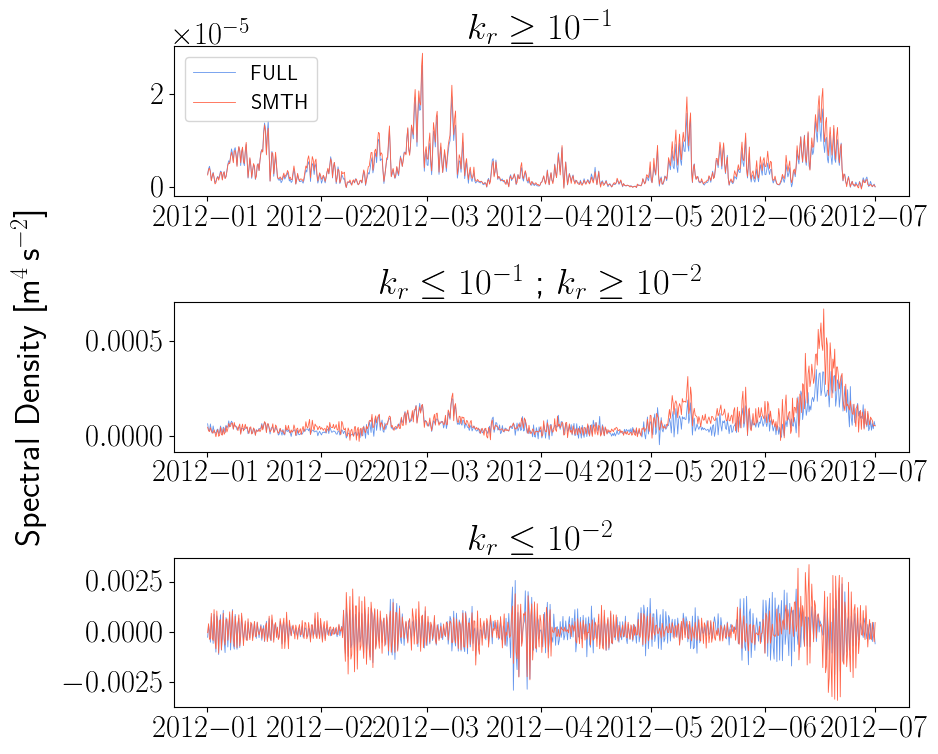

In [148]:
fig,axs = plt.subplots(3,1,figsize=(10,8))
lws=0.6

axs[0].plot(WB_f.ocean_time,WB_f1,label='FULL',linewidth=lws,color='cornflowerblue')
axs[0].plot(WB_f.ocean_time,WB_t1,label='SMTH',linewidth=lws,color='tomato')
axs[0].set_title(r'$k_r \geq 10^{-1}$')
axs[0].legend(loc=2,fontsize=15)


axs[1].plot(WB_f.ocean_time,WB_f2,linewidth=lws,color='cornflowerblue')
axs[1].plot(WB_f.ocean_time,WB_t2,linewidth=lws,color='tomato')
axs[1].set_title(r'$k_r \leq 10^{-1}$ ; $k_r \geq 10^{-2}$')



axs[2].plot(WB_f.ocean_time,WB_f3,linewidth=lws,color='cornflowerblue')
axs[2].plot(WB_f.ocean_time,WB_t3,linewidth=lws,color='tomato')
axs[2].set_title(r'$k_r\leq10^{-2}  $')



fig.supylabel('Spectral Density [m$^4\,$s$^{-2}$] ',fontsize=25,x=0.05)

plt.tight_layout()
plt.savefig('/homes/metogra/iufarias/Documents/figures/2_CROCO/CROCO_zintegrated/wb_50m_per_kr.png')



## Upwelling Index

In [152]:

path='/data/pacific/lrenault/SASI/CROCO/FULL/'
listm=glob(path+'surf*.nc');listm.sort()
# varf=xr.open_dataset(listm[-9:][xmon])
varf=xr.open_mfdataset(listm[1:],data_vars='minimal')

path='/data/pacific/lrenault/SASI/CROCO/SMTH/'
listt=glob(path+'surf*SASI_6h_his_20*_*.nc');listt.sort()
listt.append('/data/pacific/lrenault/SASI/CROCO/SMTH/surf_SASI_6h_his_2012-07.nc')
#vart=xr.open_dataset(listt[xmon])
vart=xr.open_mfdataset(listt[1:],data_vars='minimal')

In [156]:
chunks_new={'time_counter':10}

In [159]:
%%time

tf=varf.temp#.groupby("time_counter.dayofyear").mean()
tf=tf.chunk(chunks=chunks_new);
tf=tf.compute();
# tf=tf[:,120:-120,120:800].compute();

tt=vart.temp#.groupby("time_counter.dayofyear").mean()
tt=tt.chunk(chunks=chunks_new);
tt=tt.compute();
# tt=tt[:,120:-120,120:800].compute();

CPU times: user 6.92 s, sys: 6.07 s, total: 13 s
Wall time: 1min 19s


In [178]:
import seaborn as sb

(1, 852)

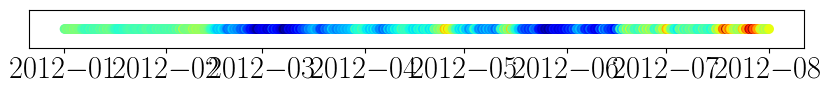

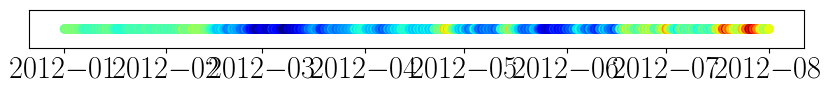

In [219]:


plt.figure(figsize=(10,0.5))
plt.scatter(tf.time_counter.data,np.zeros(tf.time_counter.shape),
            c=np.array([tf[:,:,800:900].mean(['y_rho','x_rho'])]).T,
            vmax=tf[:,:,800:900].mean(['y_rho','x_rho']).max(),
            vmin=tf[:,:,800:900].mean(['y_rho','x_rho']).min(),cmap='jet')
# plt.ylim(-0.001,0.001)
plt.yticks([])
plt.tight_layout()

plt.figure(figsize=(10,0.5))
plt.scatter(tt.time_counter.data,np.zeros(tt.time_counter.shape),
            c=np.array([tt[:,:,800:900].mean(['y_rho','x_rho'])]).T,
            vmax=tf[:,:,800:900].mean(['y_rho','x_rho']).max(),
            vmin=tf[:,:,800:900].mean(['y_rho','x_rho']).min(),cmap='jet')
# plt.ylim(-0.001,0.001)
plt.yticks([])
plt.tight_layout()

In [ ]:
# plt.figure(figsize=(10,4))
# plt.plot(tf.time_counter,tf[:,:,800:900].mean(['y_rho','x_rho']))
# plt.plot(tt.time_counter,tt[:,:,800:900].mean(['y_rho','x_rho']))

plt.figure(figsize=(10,4))
plt.plot(tf.time_counter,tf[:,:,850:900].mean(['y_rho','x_rho']))
plt.plot(tt.time_counter,tt[:,:,850:900].mean(['y_rho','x_rho']))
plt.savefig('/homes/metogra/iufarias/Documents/figures/2_CROCO/MLD+PBL/surface_upwelling_index_50m.png')

